# Question - 2

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import random
import operator

In [2]:
edgelist = pd.read_csv('com-amazon.ungraph.txt', delimiter='\t', header = None)
G = nx.read_edgelist('com-amazon.ungraph.txt', delimiter='\t')

In [3]:
def push(p, r, u):
    p_ = p
    r_ = r
    
    try:
        p_[u] = p[u] + 0.2*r[u]
    except:
        try:
            p_[u] = 0.2*r[u]
        except:
            try:
                p_[u] = p[u]
            except:
                p_[u] = 0
            
    try:
        r_[u] = 0.8*r[u]/2.0
    except:
        r_[u] = 0
    
    indeg = []
    for i in G.neighbors('%d'%(u)):
        indeg.append(int(i))
        
    for v in indeg:
        try:
            r_[v] = r[v] + (0.8*r[u])/(2.0*(len(indeg)))
        except:
            try:
                r_[v] = (0.8*r[u])/(2.0*(len(indeg))) 
            except:
                try:
                    r_[v] = r[v]
                except:
                    r_[v] = 0
            
    return p_, r_

In [4]:
def maxrd(r, G):
    mi = 0
    for u in r:
        temp = r[u]/float(G.degree('%d'%(u)))
        if temp > mi:
            mi = temp
            
    return mi

def anyrd(r, G):
    mi = []
    for u in r:
        temp = r[u]/float(G.degree('%d'%(u)))
        if temp >= 0.001:
            mi.append(u)
            
    return random.choice(mi)

In [5]:
def ApproximatePageRank(v, G):
    p = {}
    r = {}
    r[v] = 1
    
    while maxrd(r, G) >= 0.001:
        u = anyrd(r, G)
        p, r = push(p, r, u)
        
    return p

In [6]:
def cond(G,S):
    S = [str(i) for i in S]
    return nx.algorithms.cuts.conductance(G, set(S))

In [7]:
import matplotlib.pyplot as plt

def plt_sorted_list_q(sorted_x, G, u):
    cond_num = []
    for k in range(1, len(sorted_x)):
        s_list = []
        for i in sorted_x[-k:]:
            s_list.append(i[0])

        cond_num.append(cond(G, s_list))

    plt.plot(range(1, len(sorted_x)), cond_num, 'g')
    plt.scatter(range(1, len(sorted_x)), cond_num)
    plt.xlabel('Value of K')
    plt.ylabel('Cluster Quality (Conductance)')
    plt.title('Seed Node -- %s'%(u))
    plt.show()

In [8]:
def precision_plot(dict_candidate,  sorted_x, G, u):
    communities = dict_candidate[str(u)]
    comm_plt = {}
    
    for t,w in enumerate(communities):
        frac_k = []
        for k in range(1, len(sorted_x)):
            s_list = []
            for i in sorted_x[-k:]:
                s_list.append(str(i[0]))
            
            s_list = set(s_list)
            w_set = set(w)
            
            int_s_w = s_list.intersection(w_set)
            frac = len(int_s_w)/float(len(s_list))
            frac_k.append(frac)
        
        plt.scatter(range(1, len(sorted_x)), frac_k)
        plt.plot(range(1, len(sorted_x)), frac_k)
        plt.xlabel('Value of K')
        plt.ylabel('Precision')
        plt.title('Community -- %d'%(t))
        plt.ylim((0,1.05))
        plt.show()  

In [9]:
fh = open('com-amazon.all.dedup.cmty.txt', 'r')
comm = fh.readlines()
comm = [i.replace('\n','').split('\t') for i in comm]

In [10]:
candidate = ['143608', '243284', '152623', '533768', '59217']
dict_candidate = {}

for i in candidate:
    for j in comm:
        if i in j:
            try:
                dict_candidate[i].append(j)
            except:
                dict_candidate[i] = [j] 

Number of Nodes in support of 143608 ----  [541959, 419483, 13732, 5829, 255303, 48968, 327145, 187370, 410887, 539820, 498286, 118943, 366418, 507155, 98588, 143608, 168570, 410943, 377884, 193654, 255775]


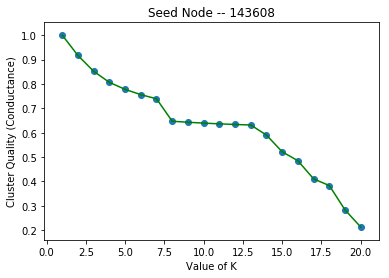

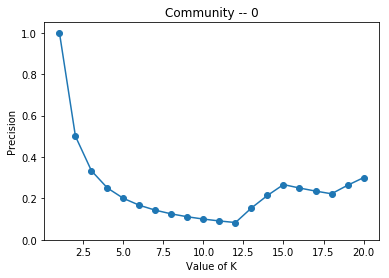

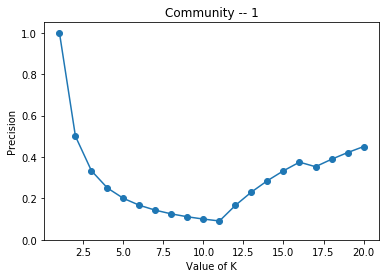

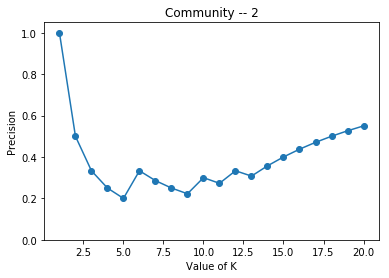

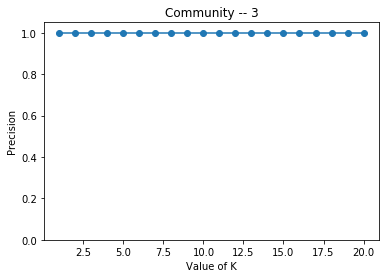

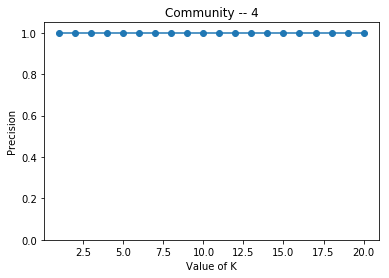

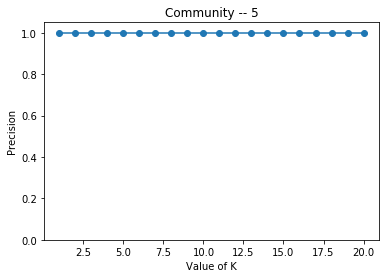

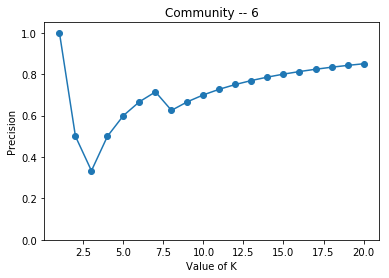

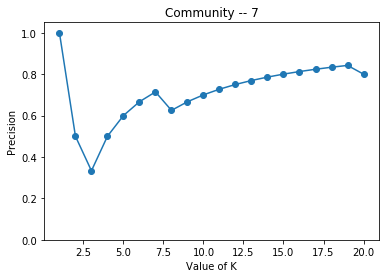

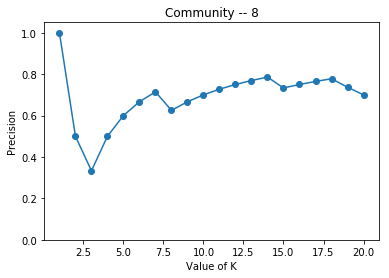

Number of Nodes in support of 243284 ----  [42176, 93547, 108203, 419212, 501901, 375470, 36240, 181169, 243284, 150741, 344212]


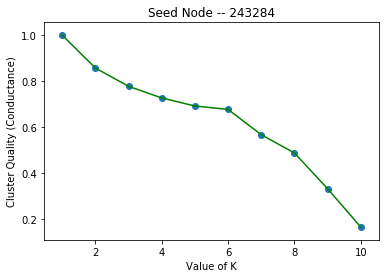

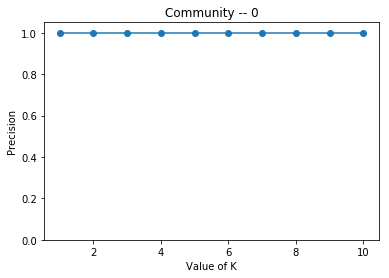

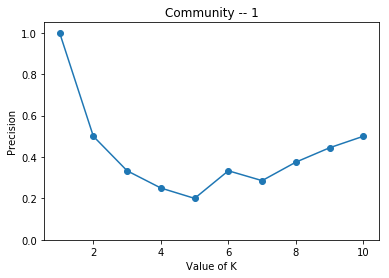

Number of Nodes in support of 152623 ----  [251888, 172515, 510977, 537574, 503142, 526119, 501512, 524713, 531909, 508151, 261897, 152623, 351088, 246707, 520180, 336439, 51511, 371052, 436219, 480016, 156415]


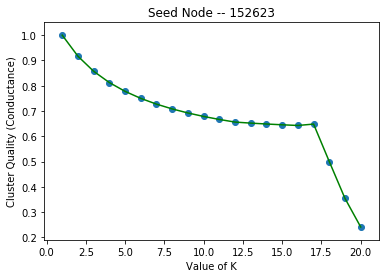

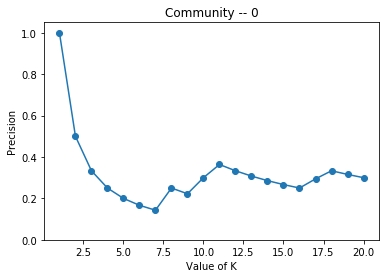

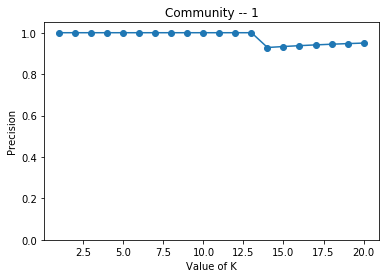

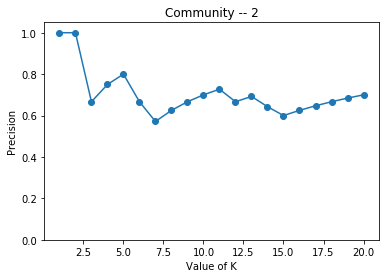

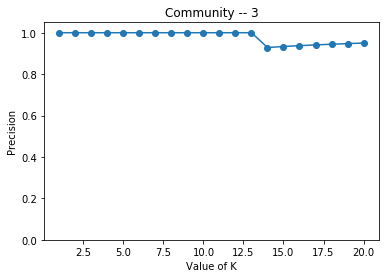

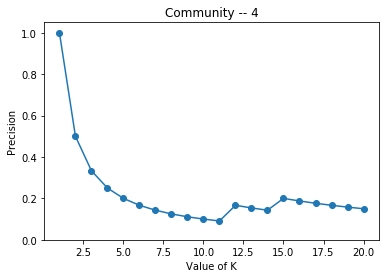

Number of Nodes in support of 533768 ----  [249536, 342923, 120511, 533768, 165323, 185964, 265293, 278127, 209840, 135307, 520757, 438584, 133754, 91487, 216701, 367135]


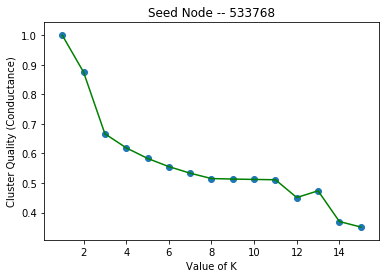

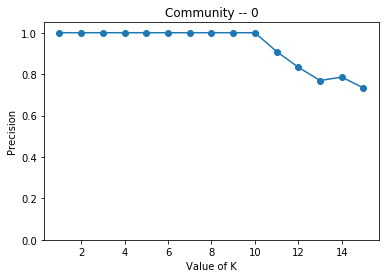

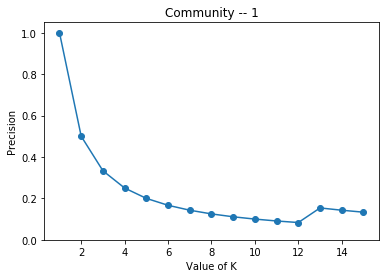

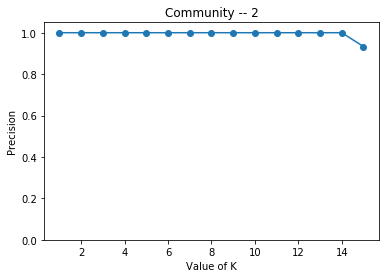

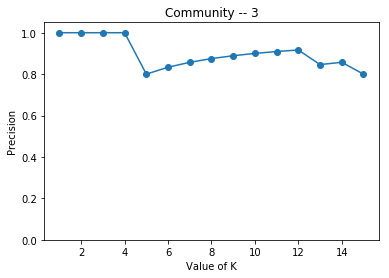

Number of Nodes in support of 59217 ----  [396290, 471555, 534674, 441494, 237080, 37532, 417568, 6050, 202791, 265901, 443954, 448951, 479931, 45762, 369732, 243277, 131921, 241253, 59217, 520946, 38132, 547579, 538748]


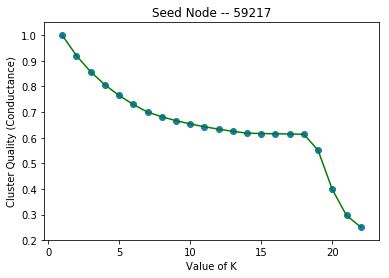

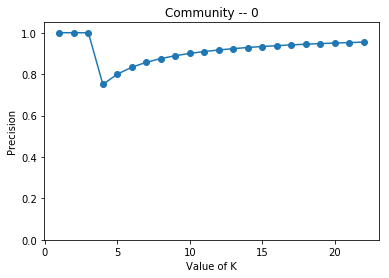

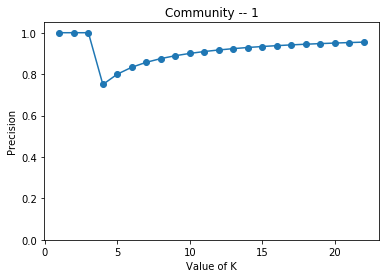

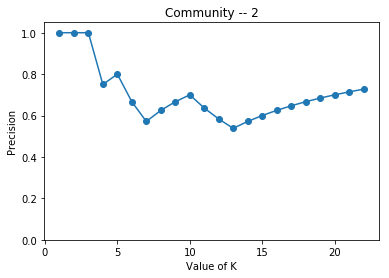

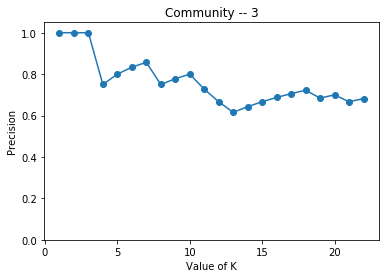

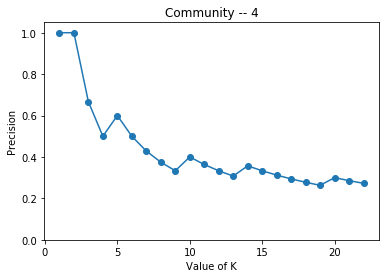

In [11]:
for i in candidate:
    q = ApproximatePageRank(int(i), G)

    for y in q:
        q[y] = q[y]/float(G.degree('%d'%(y)))
        
    print 'Number of Nodes in support of %s ---- '%(i), q.keys()
    
    sorted_x = sorted(q.items(), key=operator.itemgetter(1))
    plt_sorted_list_q(sorted_x, G, i)
    precision_plot(dict_candidate, sorted_x, G, i)